# Steps

1. preprocessing image
2. load model
3. extract feature from image
4. prediction
5. validation model

In [1]:
# imports

import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib

# %matplotlib inline
plt.rcParams['figure.dpi'] = 200

In [2]:
# get human face 68 key points

In [3]:
# face detection hog
hog_face_etector = dlib.get_frontal_face_detector()

In [4]:
# keypoint model detection
shape_detector = dlib.shape_predictor('./weights/shape_predictor_68_face_landmarks.dat')

In [5]:
# read image
img = cv2.imread('./images/fake_ai_faces.0.png')

In [6]:
# detect face
detections = hog_face_etector(img,1)

In [7]:
for face in detections:
    l,t,r,b = face.left(), face.top(),face.right(),face.bottom()
    # get 68 keypoint
    points = shape_detector(img,face)
    
    # draw ap keypoint
    for point in points.parts():
        cv2.circle(img,(point.x, point.y), 2, (0, 255,0),1)
    
    # draw bbox
    cv2.rectangle(img,(l,t),(r,b),(0,255,0),2)
    

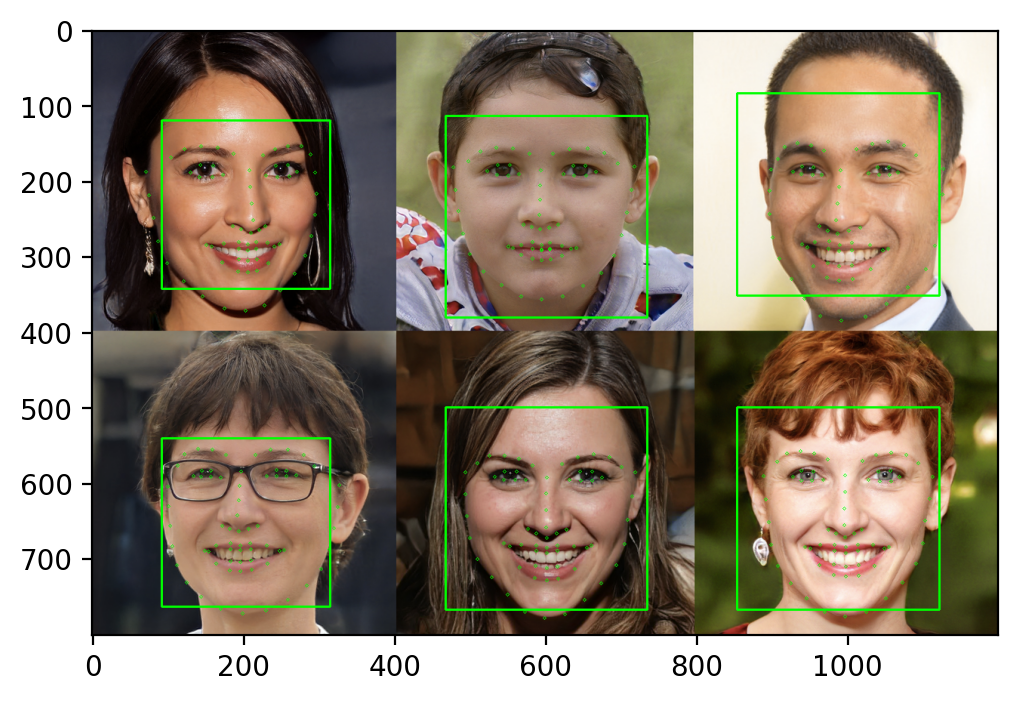

In [8]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [9]:
# face feature

In [10]:
# face detection hog
hog_face_etector = dlib.get_frontal_face_detector()
# keypoint model detection
shape_detector = dlib.shape_predictor('./weights/shape_predictor_68_face_landmarks.dat')
# resnet model
face_descriptor_extractor = dlib.face_recognition_model_v1('./weights/dlib_face_recognition_resnet_model_v1.dat')

In [11]:
# extract single image feature , label
def getFaceFeatureLabel(fileName):
    # read image
    # get fece label
    label_id = int(fileName.split('/')[-1].split('.')[0].split('subject')[-1])
    
    cap = cv2.VideoCapture(fileName)
    ret, img = cap.read()
    
    # conver to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # face detection
    detections = hog_face_etector(img,1)
    face_descriptor = None
    for face in detections:
        # get keypoint
        points = shape_detector(img, face)
        # get face descriptor
        face_descriptor = face_descriptor_extractor.compute_face_descriptor(img,points)
        # convert to numpy array
        face_descriptor = [f for f in face_descriptor]
        face_descriptor = np.array(face_descriptor, dtype=np.float64)
        face_descriptor = np.reshape(face_descriptor,(1,-1))
        
    return label_id, face_descriptor

In [12]:
# test
id1,fd1 = getFaceFeatureLabel('./yalefaces/train/subject01.noglasses.gif')

In [13]:
id1

1

In [14]:
len(fd1)

1

In [15]:
# iterate train folder for all picture

import glob

file_list = glob.glob('./yalefaces/train/*')
label_list = []
feature_list = None
name_list = {}
index = 0
for train_file in file_list:
    # Get picture info based on file name
    label, feature = getFaceFeatureLabel(train_file)
    
    # Filter information
    if feature is not None:
        # list of filenames
        name_list[index] = train_file
        # list of labels
        label_list.append(label)
        if feature_list is None:
            feature_list = feature
        else:
            feature_list = np.concatenate((feature_list,feature),axis=0)
        index +=1

In [16]:
len(label_list)

132

In [17]:
feature_list.shape

(132, 128)

In [18]:
feature_list

array([[-0.0940799 ,  0.07812061,  0.07440977, ..., -0.03673381,
         0.11907081,  0.03811302],
       [-0.12692416,  0.11018607,  0.14956065, ..., -0.03546031,
         0.09137999,  0.08175542],
       [-0.10409347,  0.03231746,  0.02779263, ..., -0.01105372,
         0.02855215, -0.00978152],
       ...,
       [-0.12948209,  0.11893784,  0.11164074, ..., -0.02910819,
         0.12647632, -0.00275271],
       [-0.12065092,  0.13196942,  0.11349209, ..., -0.18775889,
         0.13482547,  0.06330389],
       [-0.11247864,  0.10074745,  0.0572192 , ..., -0.01922876,
         0.04406465, -0.01973504]])

In [26]:
name_list

{0: './yalefaces/train/subject08.wink.gif',
 1: './yalefaces/train/subject09.wink.gif',
 2: './yalefaces/train/subject02.glasses.gif',
 3: './yalefaces/train/subject15.happy.gif',
 4: './yalefaces/train/subject06.noglasses.gif',
 5: './yalefaces/train/subject11.noglasses.gif',
 6: './yalefaces/train/subject03.sad.gif',
 7: './yalefaces/train/subject05.normal.gif',
 8: './yalefaces/train/subject14.leftlight.gif',
 9: './yalefaces/train/subject15.noglasses.gif',
 10: './yalefaces/train/subject02.noglasses.gif',
 11: './yalefaces/train/subject06.rightlight.gif',
 12: './yalefaces/train/subject13.rightlight.gif',
 13: './yalefaces/train/subject06.centerlight.gif',
 14: './yalefaces/train/subject10.leftlight.gif',
 15: './yalefaces/train/subject09.centerlight.gif',
 16: './yalefaces/train/subject02.wink.gif',
 17: './yalefaces/train/subject03.wink.gif',
 18: './yalefaces/train/subject11.sleepy.gif',
 19: './yalefaces/train/subject14.rightlight.gif',
 20: './yalefaces/train/subject08.sleepy.

In [19]:
feature_list[100]

array([-1.13765828e-01,  5.69162779e-02,  1.47467982e-02, -4.76249726e-03,
       -7.18228817e-02,  1.51505200e-02,  5.07826731e-02, -1.32247940e-01,
        2.53457904e-01, -7.39881396e-02,  1.41501293e-01, -1.57060493e-02,
       -2.32164666e-01, -8.12552124e-02, -2.63656080e-02,  8.49454850e-02,
       -1.91760138e-01, -1.79382041e-01, -8.39282647e-02, -1.07675217e-01,
       -1.02164103e-02,  2.28064181e-03,  6.17102645e-02, -1.19286571e-02,
       -1.66209251e-01, -4.03282642e-01, -7.46051371e-02, -1.43490359e-01,
       -1.45107901e-04, -9.58766341e-02,  3.94479930e-02,  8.57391115e-03,
       -2.38944173e-01, -8.42553079e-02, -9.24132839e-02,  2.85185240e-02,
       -6.05839677e-02, -4.55373935e-02,  2.08522826e-01,  3.52177746e-03,
       -1.72559530e-01, -2.66589262e-02,  2.87274681e-02,  2.72172987e-01,
        1.05017625e-01,  2.99926661e-03, -3.43690142e-02, -2.09387448e-02,
        8.88085812e-02, -2.56185502e-01,  1.07385866e-01,  1.54662400e-01,
        3.29309665e-02,  

In [27]:
# calculate distance
np.linalg.norm((feature_list[98]-feature_list[100]))

0.2527489448220982

In [28]:
np.linalg.norm((feature_list[98]-feature_list[99]))

0.8553365962563011

In [30]:
# calculate 1vsall distance
np.linalg.norm((feature_list[0]-feature_list[1:]),axis=1)

array([0.78847867, 0.88004638, 0.67271849, 0.64859348, 0.88307141,
       0.75802426, 0.8405937 , 0.58745886, 0.71560807, 0.94965134,
       0.66378286, 0.67865871, 0.66551198, 0.78007515, 0.85465824,
       0.90496354, 0.71283653, 0.8696186 , 0.55032471, 0.22201803,
       0.60176841, 0.97269718, 0.74151235, 0.88074339, 0.92525249,
       0.90274481, 0.74850244, 0.61812356, 0.34282311, 0.96207721,
       0.8546093 , 0.7825258 , 0.85968411, 0.90484549, 0.70411212,
       0.82209384, 0.65154357, 0.84203161, 0.59096675, 0.72555532,
       0.90890754, 0.91928248, 0.59846028, 0.86245655, 0.95470379,
       0.76375556, 0.9190342 , 0.54629289, 0.78008736, 0.86346718,
       0.84456851, 0.71605407, 0.88504554, 0.23455059, 0.90176451,
       0.34164162, 0.33899581, 0.8895562 , 0.27501722, 0.84617185,
       0.61395274, 0.94965134, 0.87436847, 0.70708542, 0.87857211,
       0.81758698, 0.86498136, 0.90587168, 0.836486  , 0.54228671,
       0.74918466, 0.65481363, 0.67080667, 0.70879063, 0.73411

In [31]:
# Find min index
np.argmin(np.linalg.norm((feature_list[0]-feature_list[1:]),axis=1))

19

In [32]:
np.linalg.norm((feature_list[0]-feature_list[1:]),axis=1)[19]

0.2220180258968426

In [33]:
name_list[1+19]

'./yalefaces/train/subject08.sleepy.gif'

In [37]:
np.linalg.norm((feature_list[0]-feature_list[20]))

0.2220180258968426

/var/folders/2q/ql3kvpk137j6k704_gwh34p40000gn/T/ipykernel_47340/1168452491.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


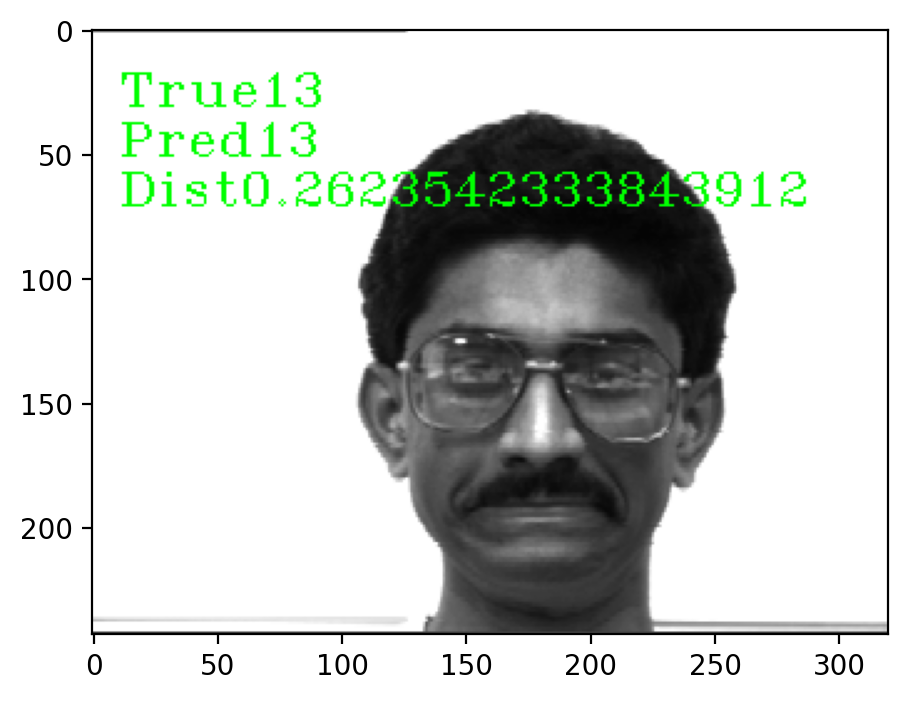

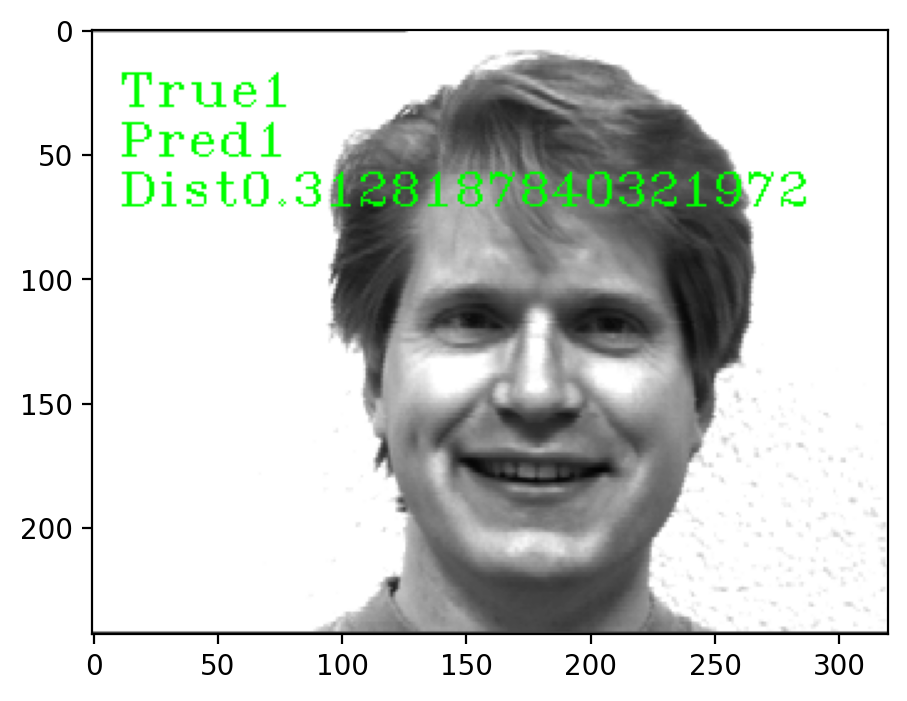

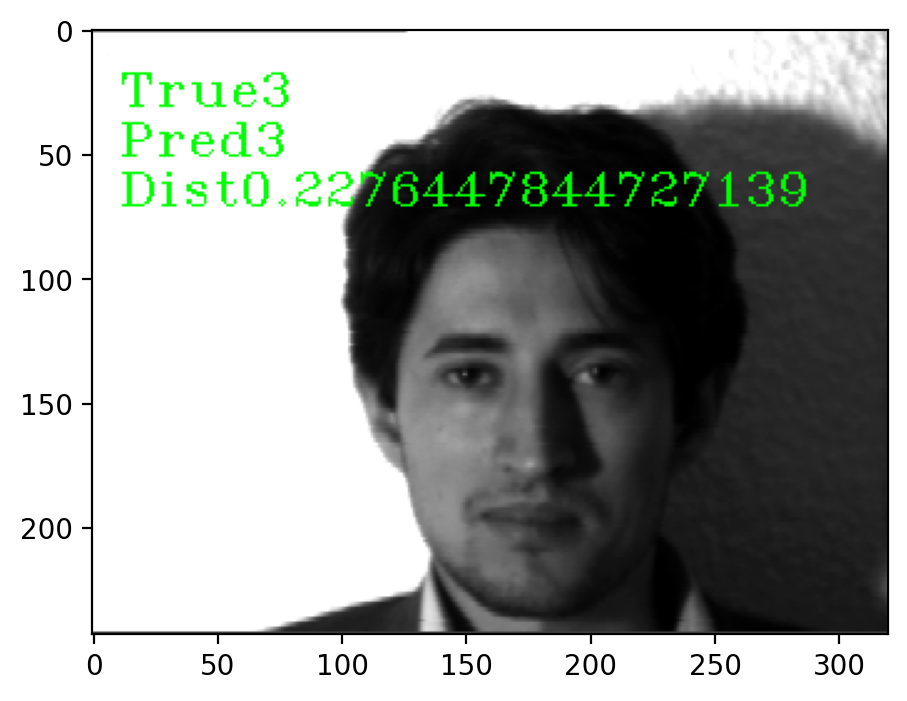

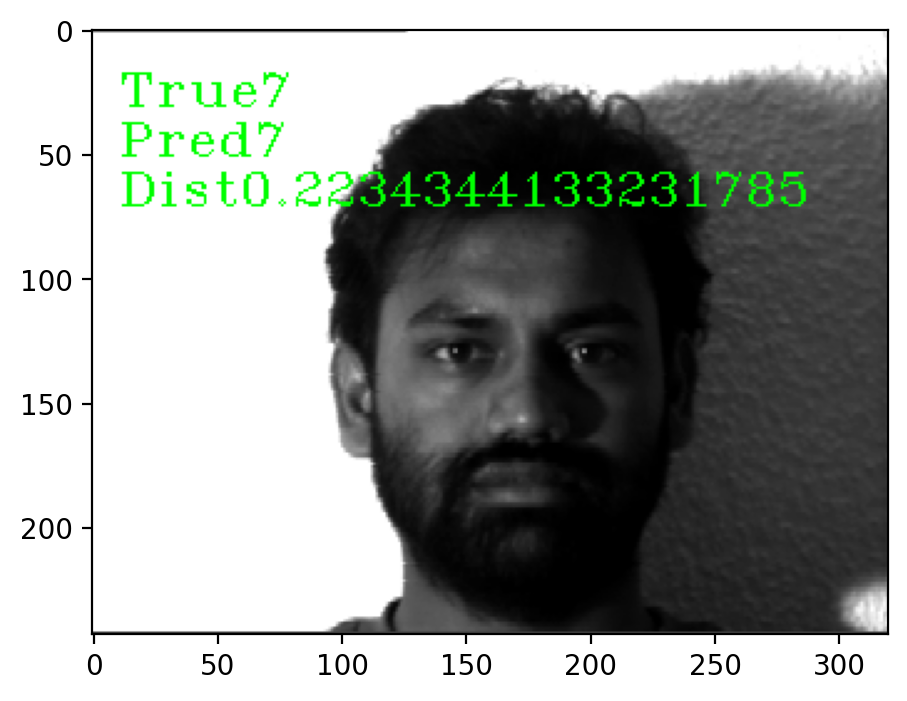

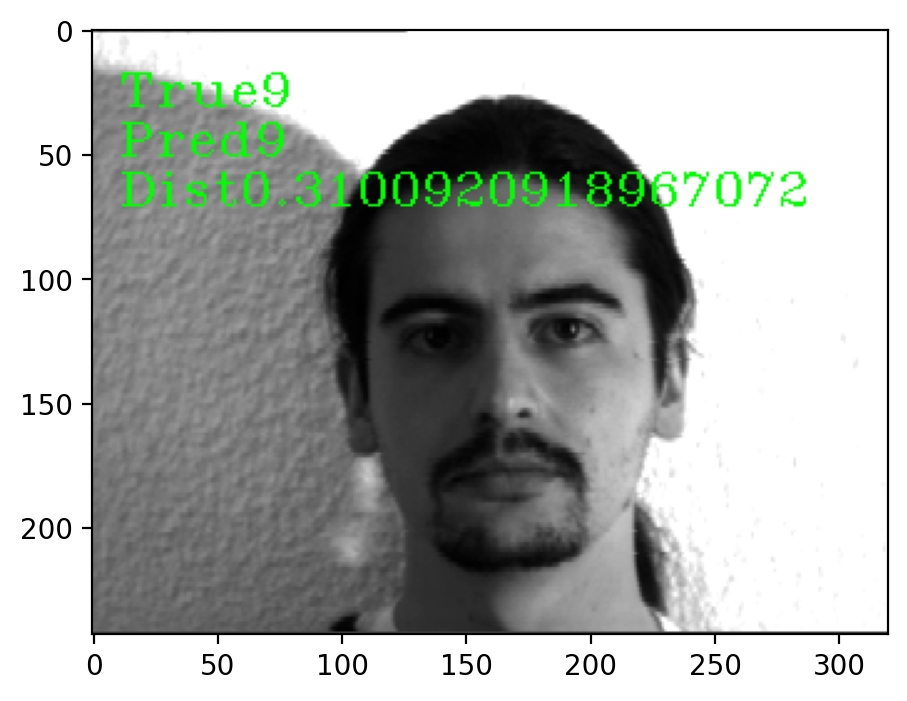

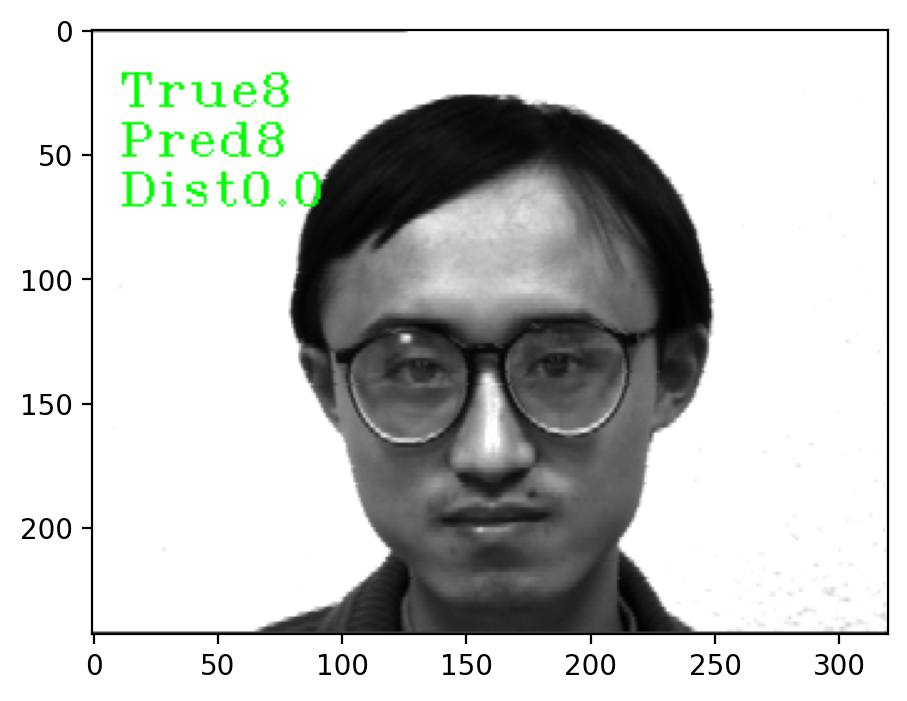

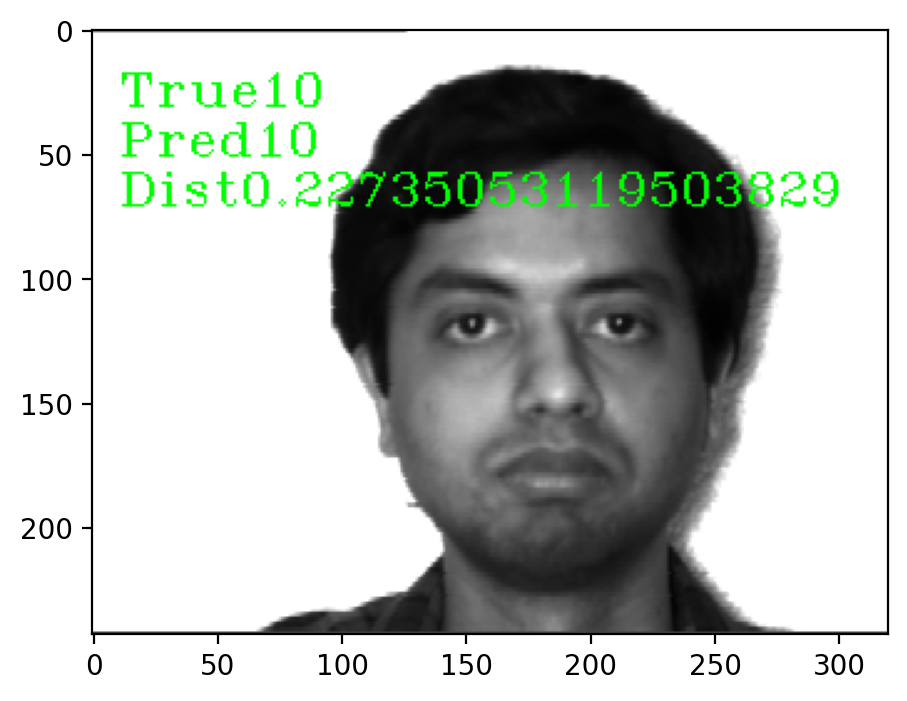

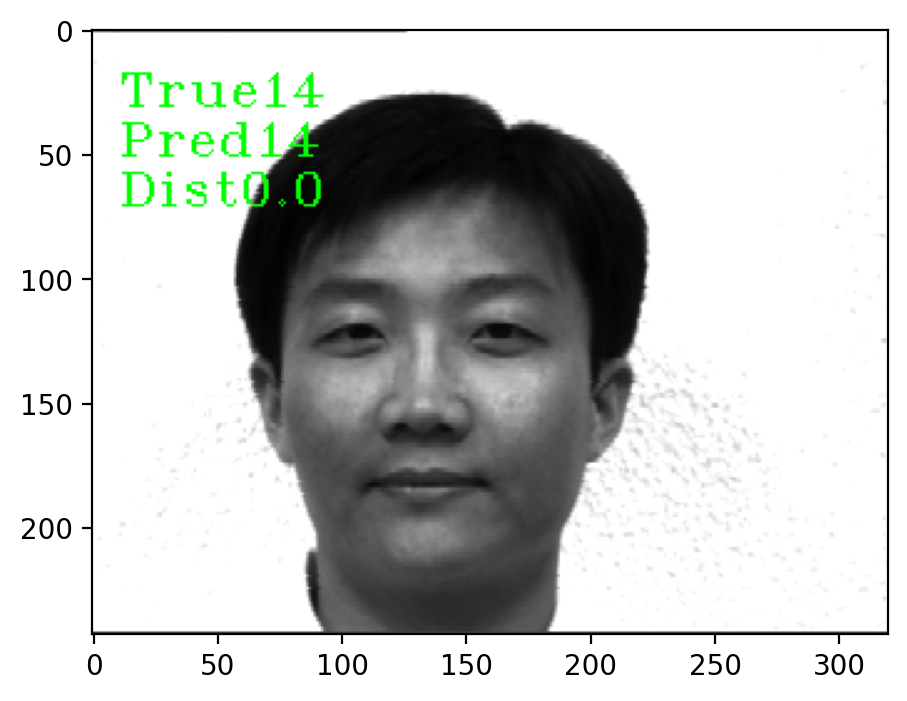

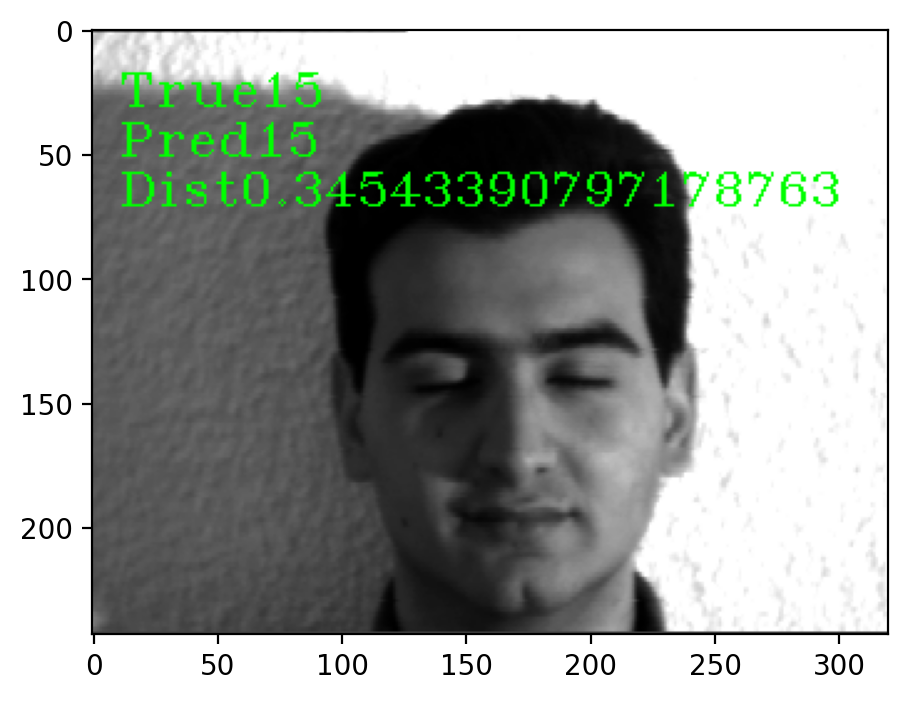

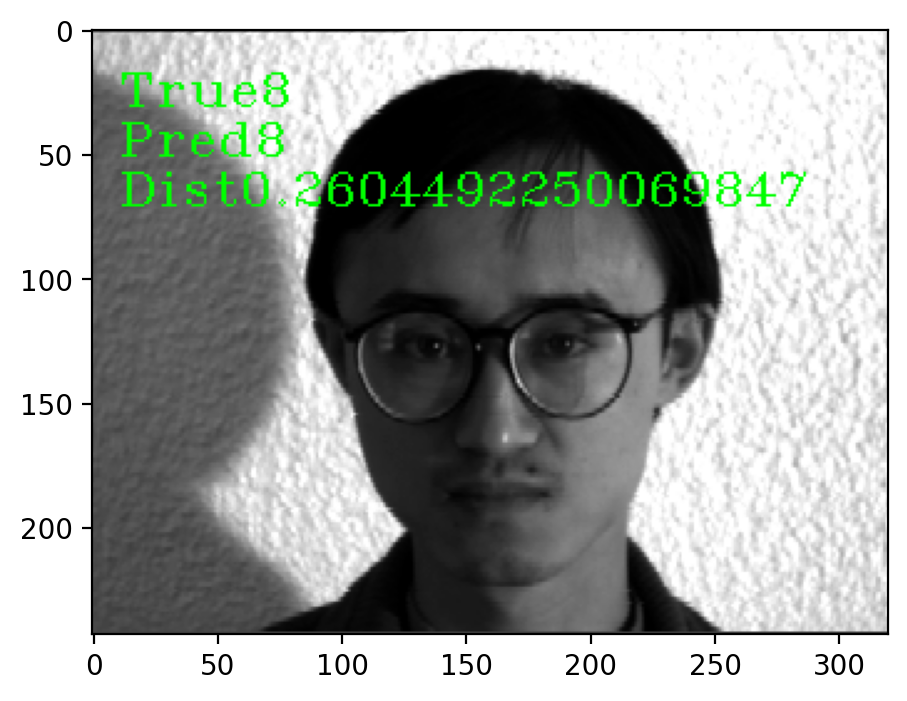

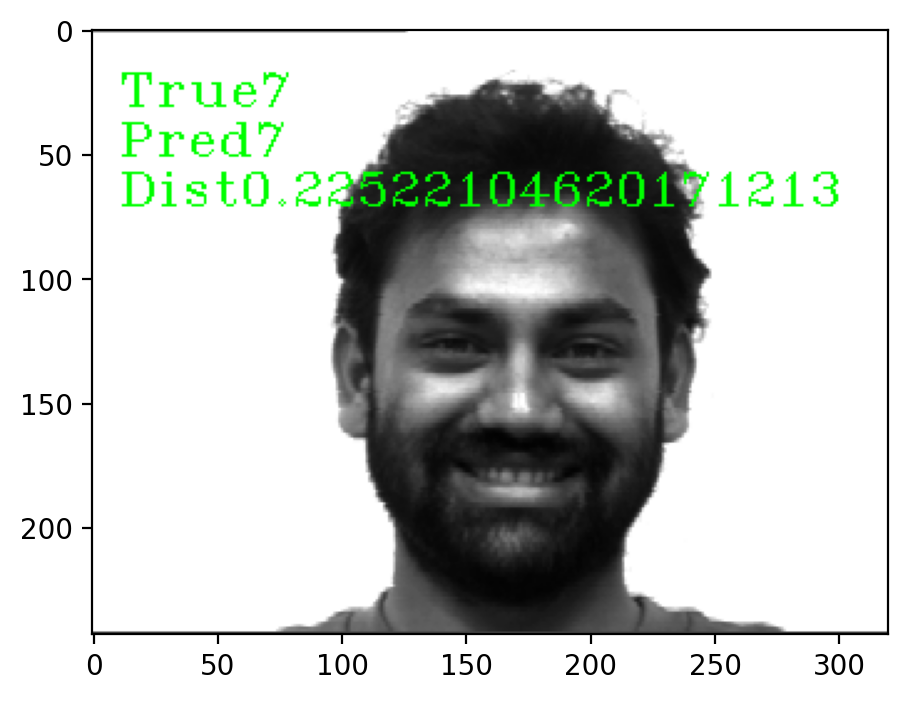

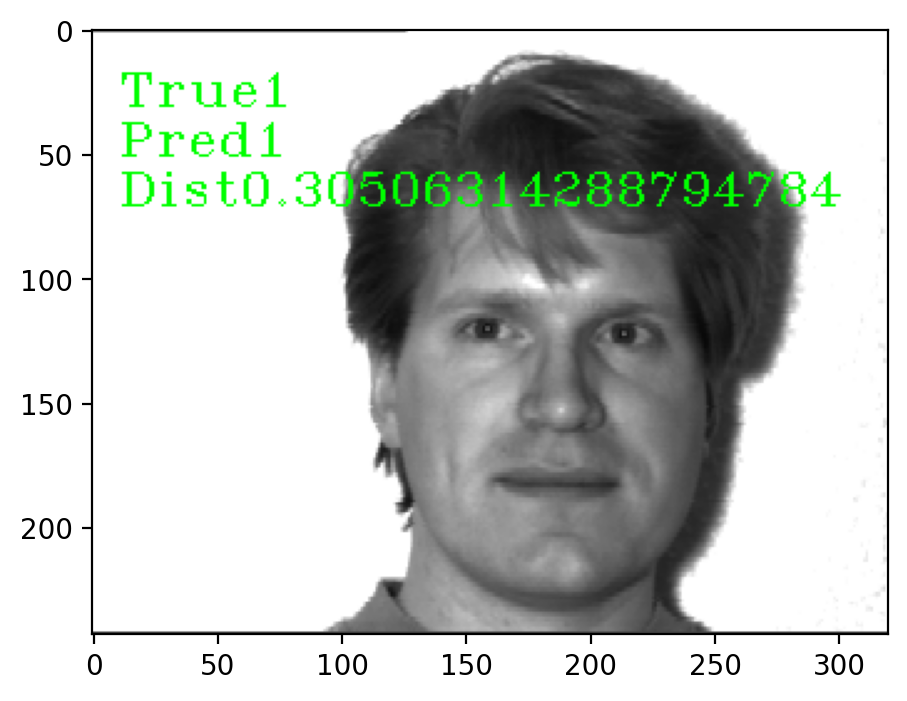

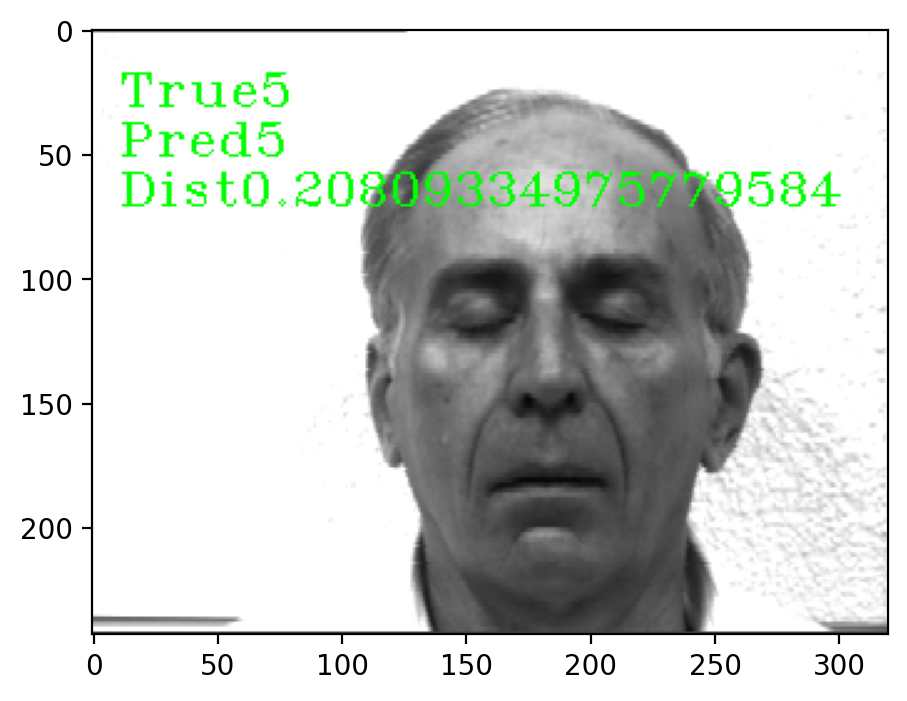

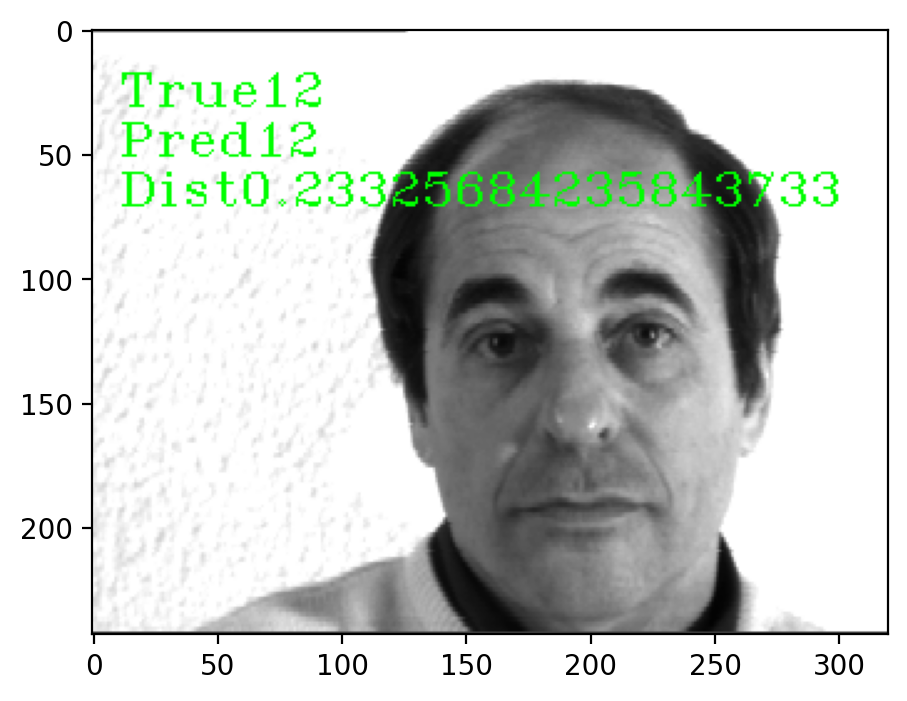

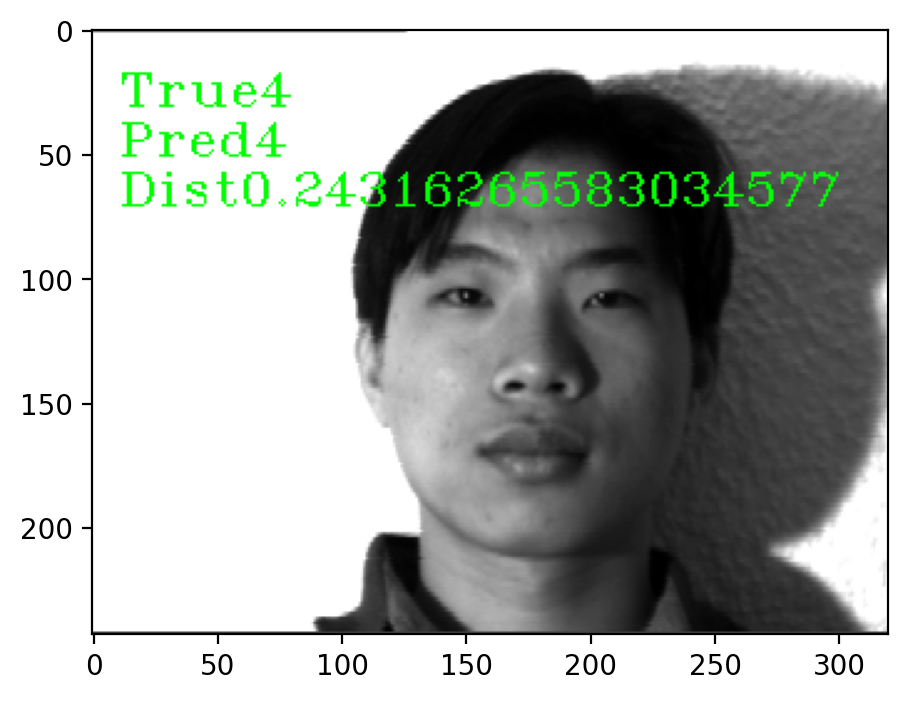

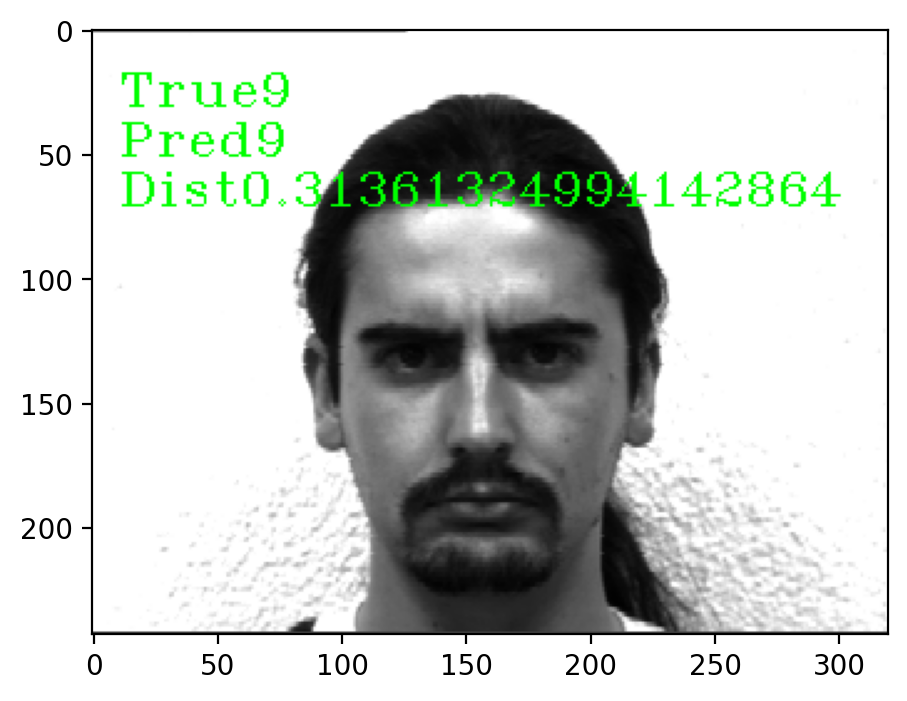

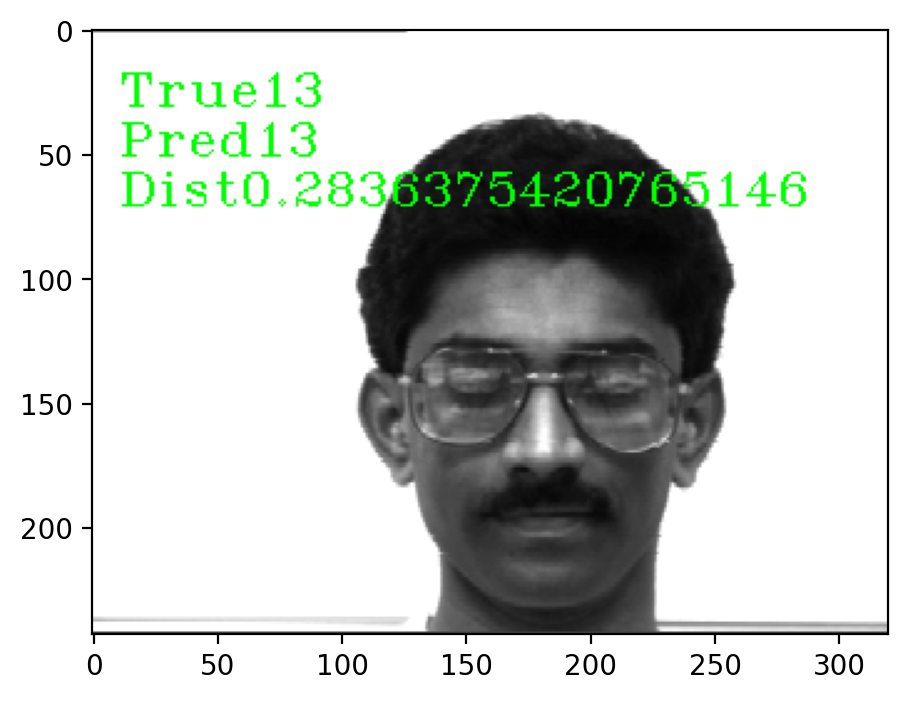

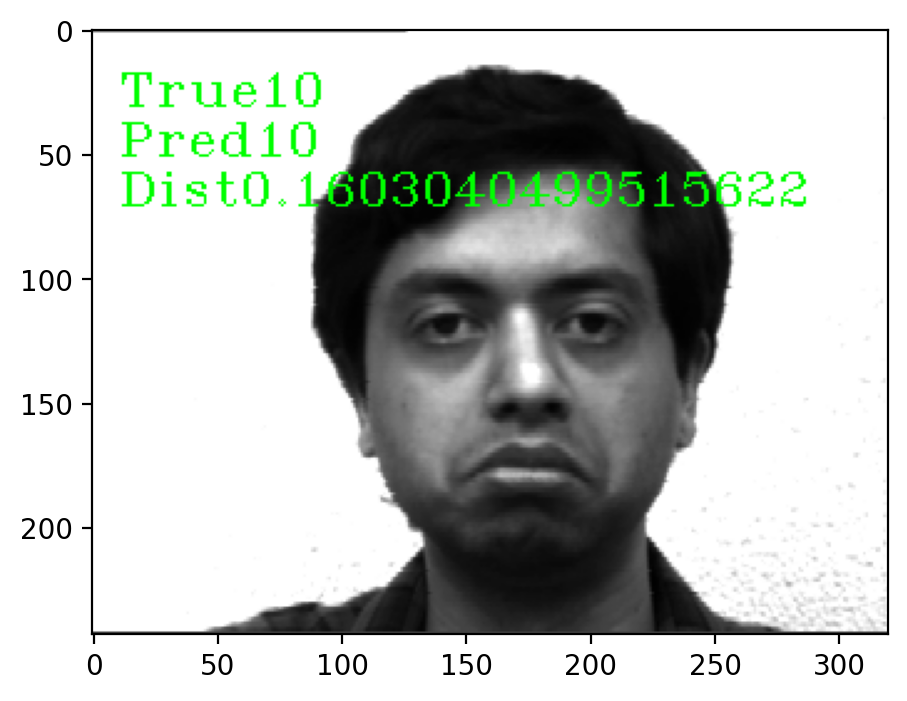

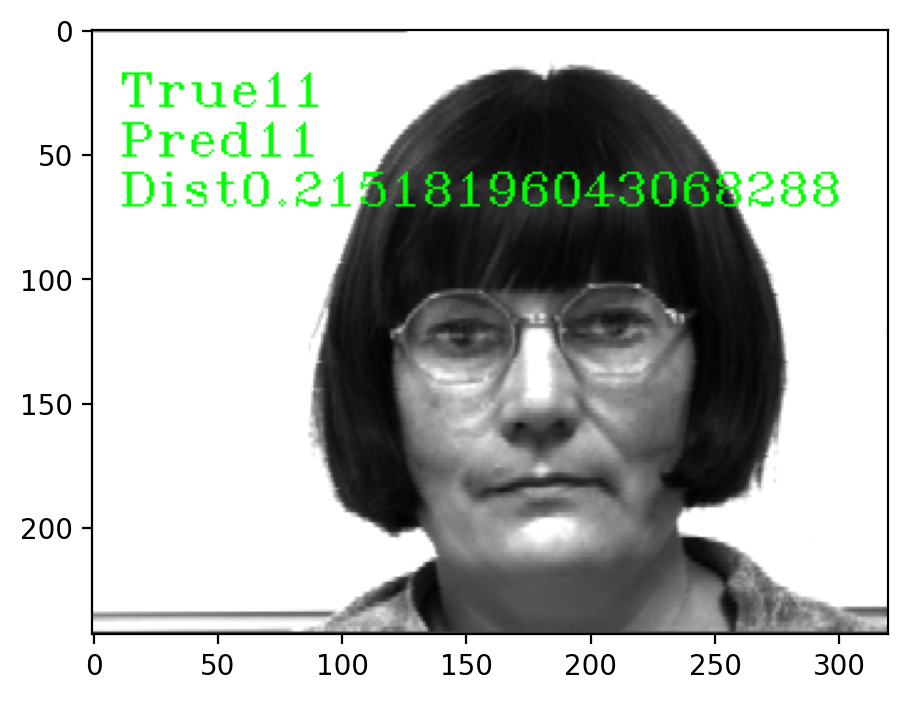

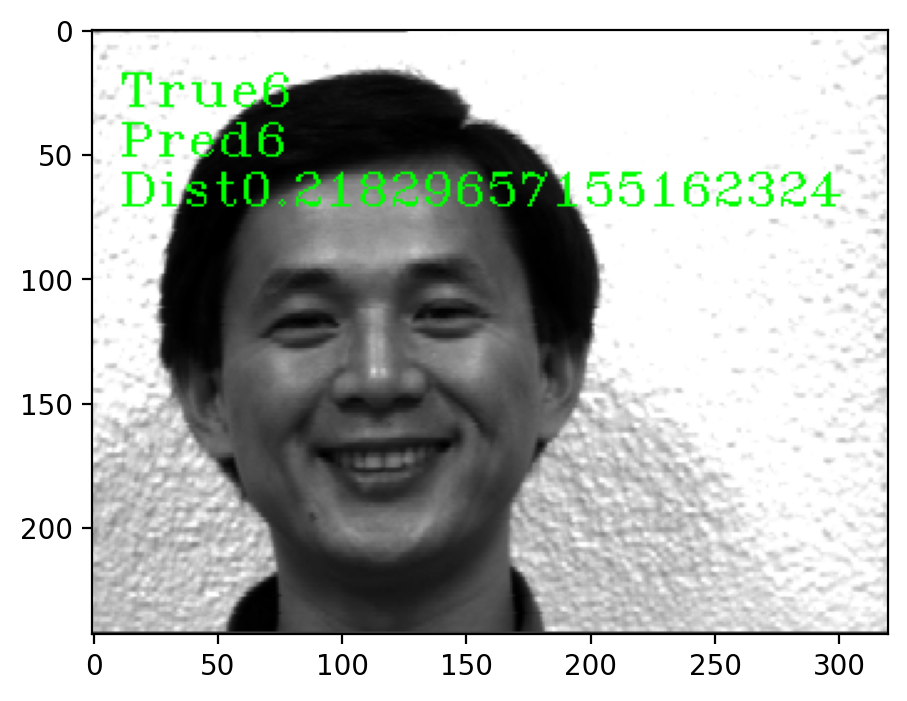

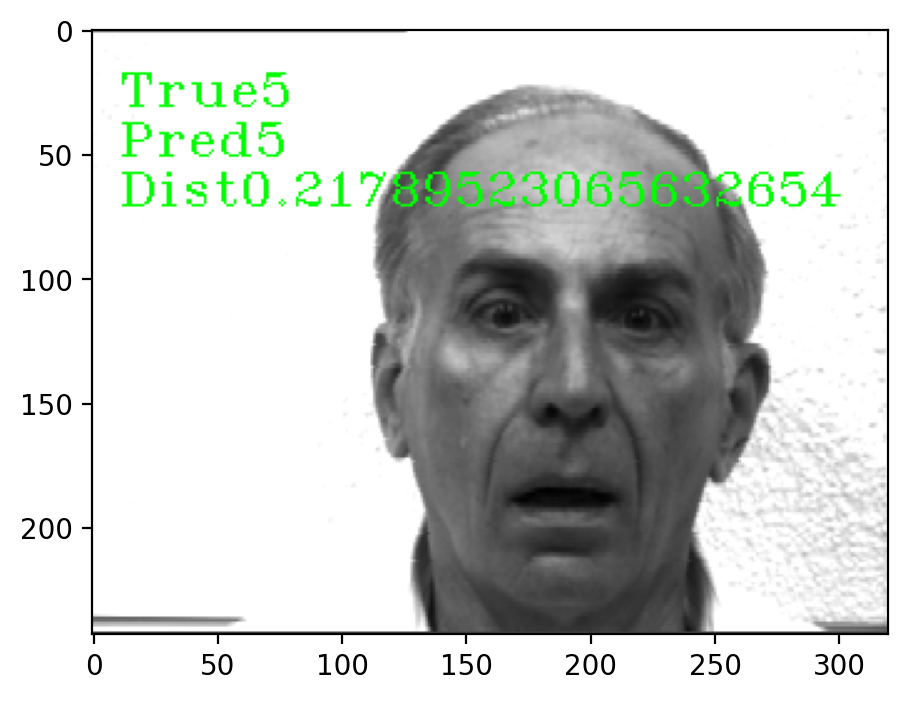

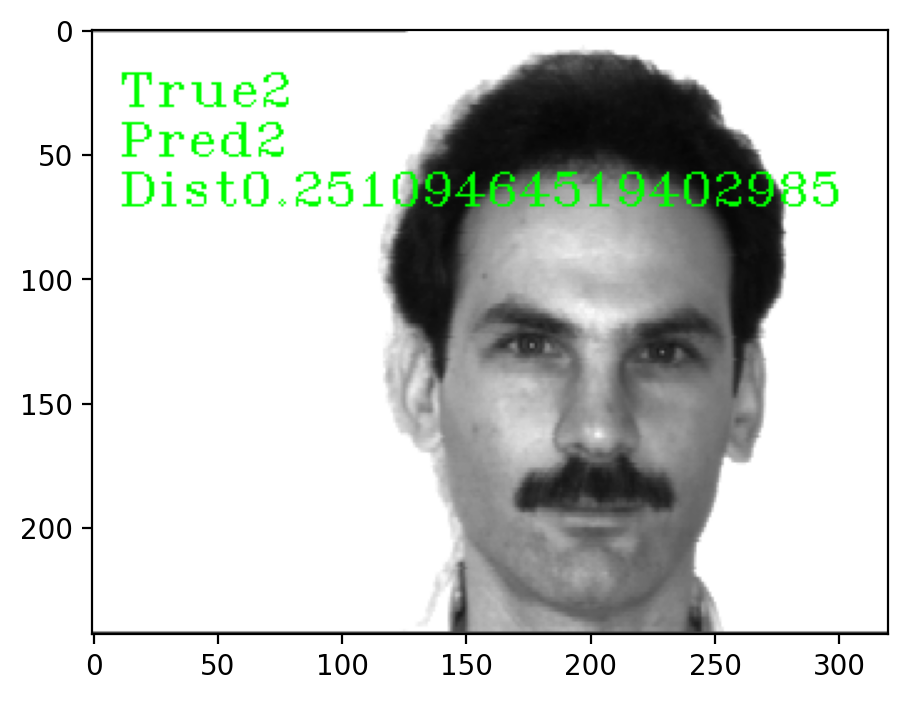

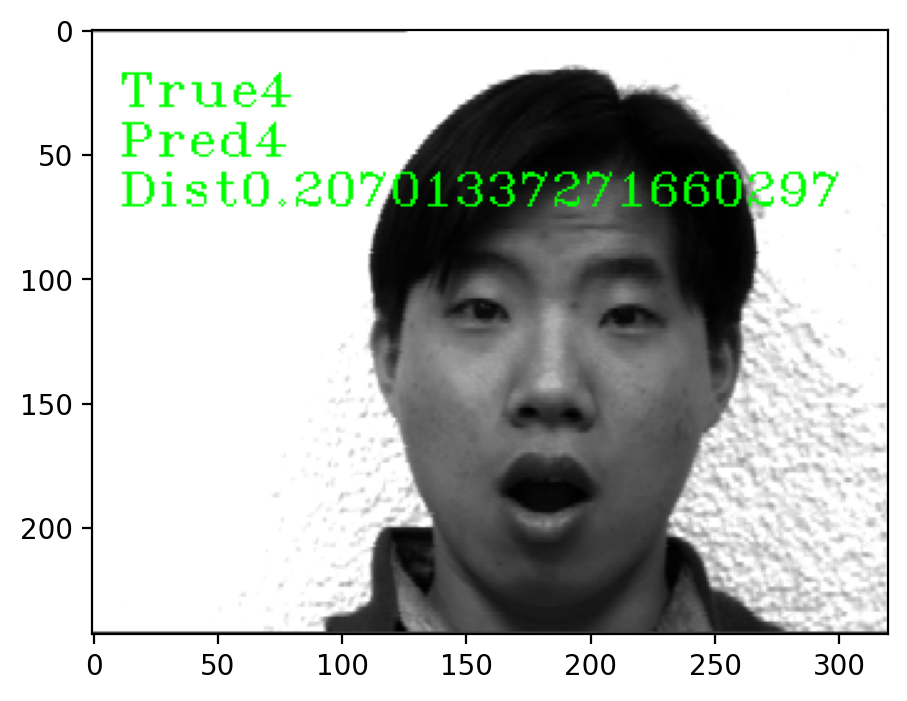

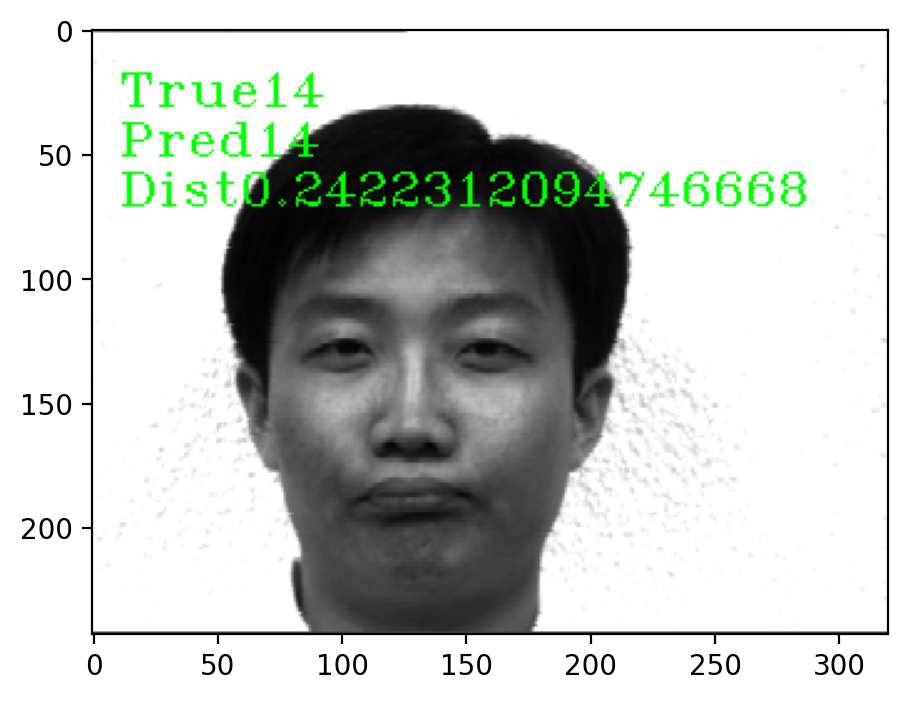

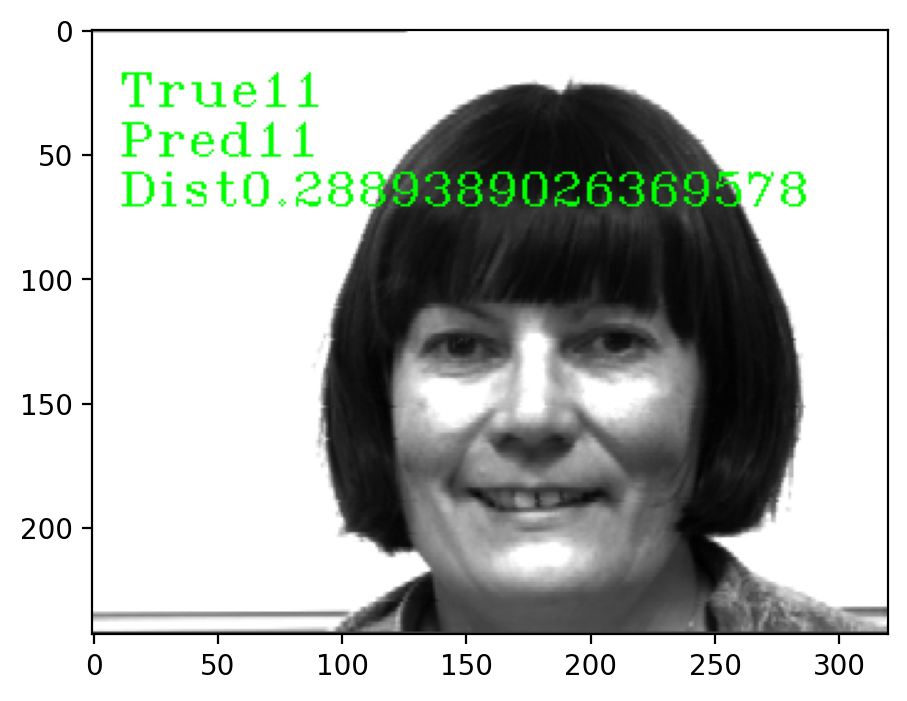

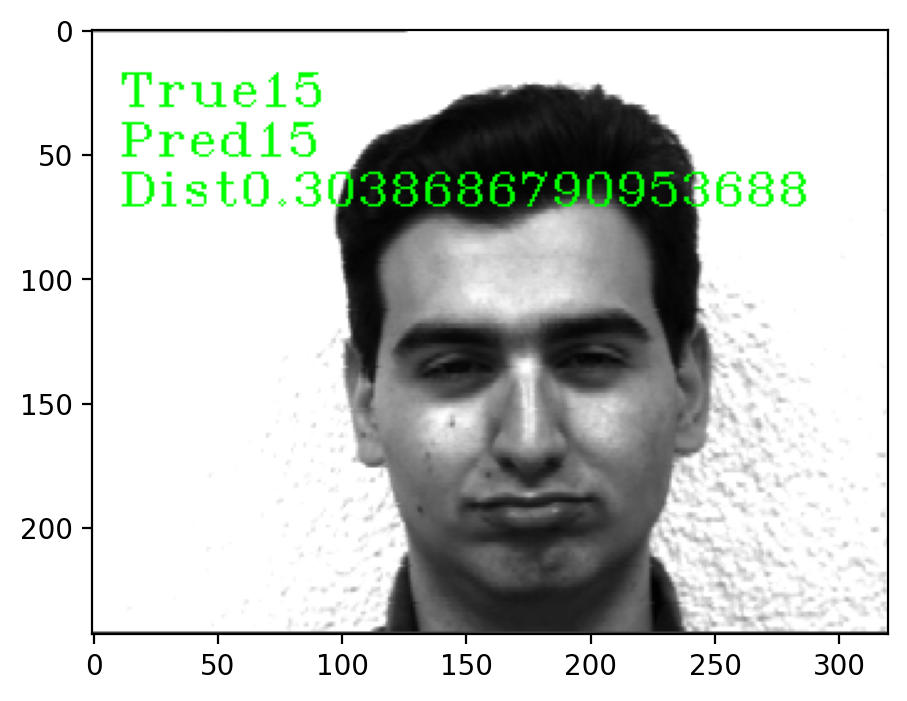

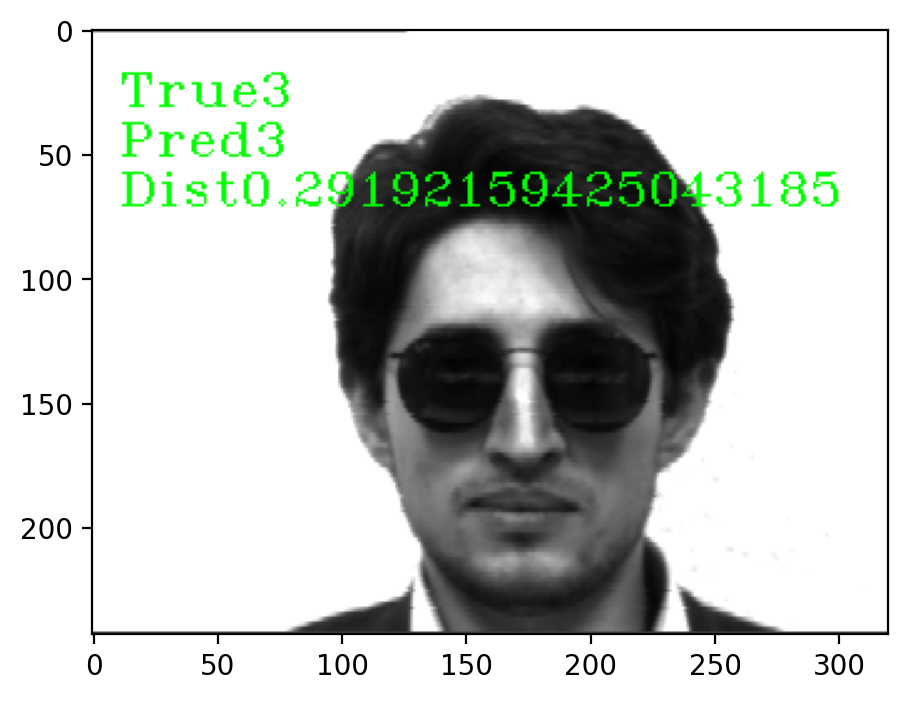

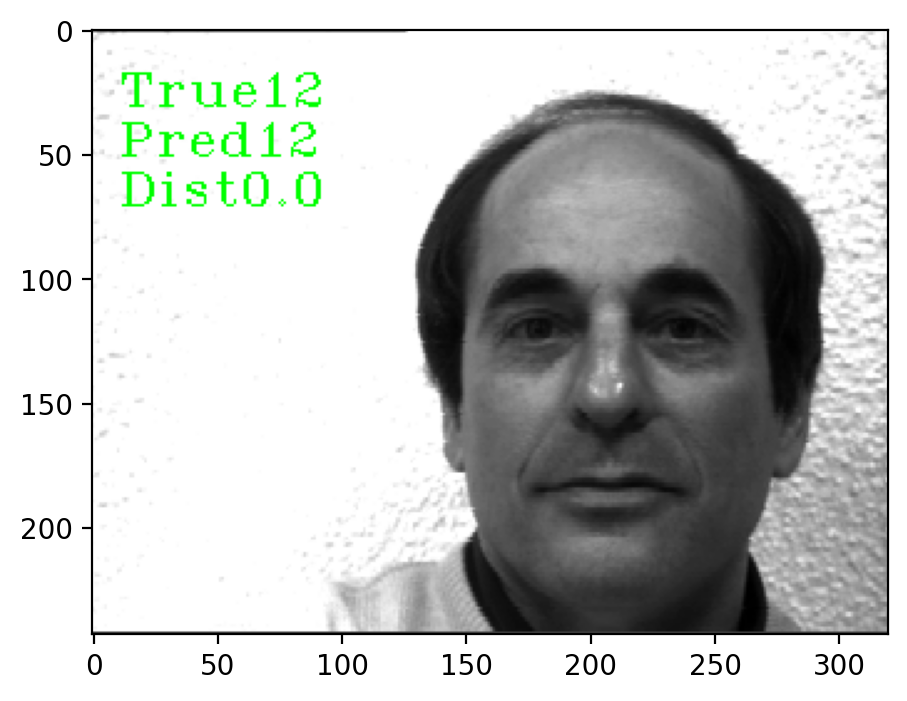

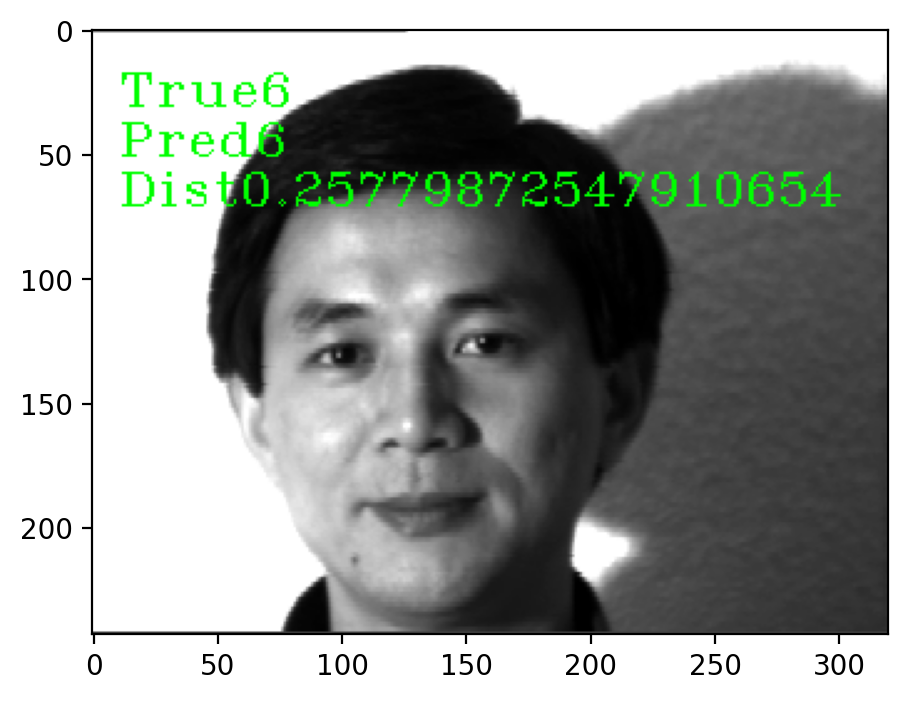

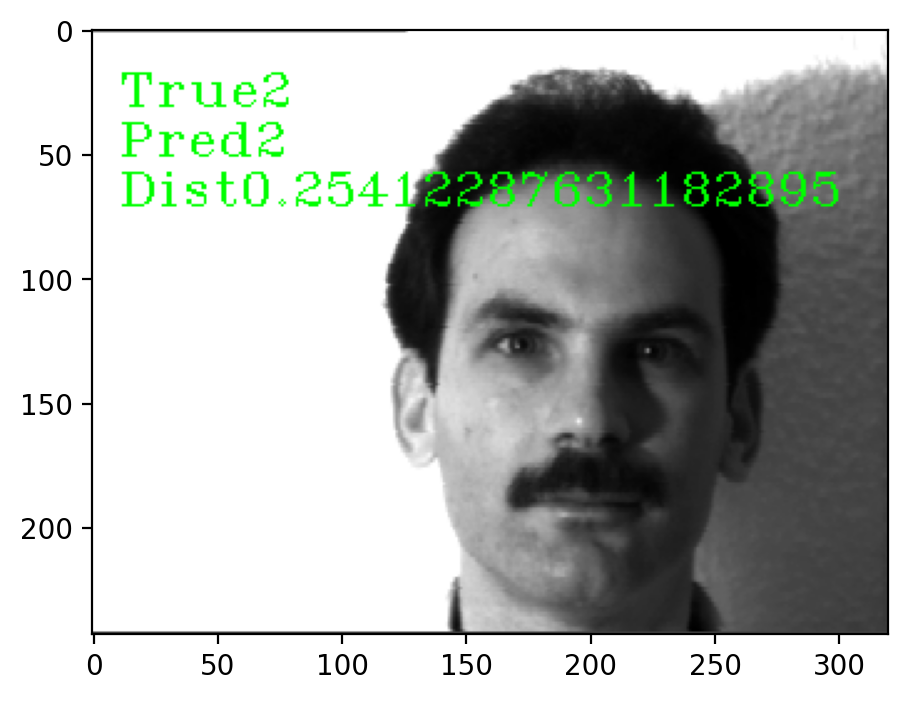

In [46]:
# validate test set

file_list = glob.glob('./yalefaces/test/*')
predict_list = []
label_list = []
# threshold
threshold = 0.5
for test_file in file_list:
    # Get picture info based on file name
    label, feature = getFaceFeatureLabel(test_file)
    
    # read image
    cap = cv2.VideoCapture(test_file)
    ret, img = cap.read()
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Filter information
    if feature is not None:
        # calculate distance
        distances = np.linalg.norm((feature-feature_list),axis=1)
        min_index = np.argmin(distances)
        min_distance = distances[min_index]
        
        if min_distance < threshold:
            # same person
            
            
            predict_id = int(name_list[min_index].split('/')[-1].split('.')[0].split('subject')[-1])

        else:
            predict_id = -1
            
        predict_list.append(predict_id)
        label_list.append(label)
        
        cv2.putText(img, 'True'+str(label), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
        cv2.putText(img, 'Pred'+str(predict_id), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
        cv2.putText(img, 'Dist'+str(min_distance), (10,70), cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))

        plt.figure()
        plt.imshow(img)

In [40]:
predict_list

[13,
 1,
 3,
 7,
 9,
 8,
 10,
 14,
 15,
 8,
 7,
 1,
 5,
 12,
 4,
 9,
 13,
 10,
 11,
 6,
 5,
 2,
 4,
 14,
 11,
 15,
 3,
 12,
 6,
 2]

In [41]:
# get accuracy

from sklearn.metrics import accuracy_score
accuracy_score(label_list,predict_list)


1.0